In [1]:
#Se van a cargar datos de una libreria para extraer datos esta es pandas
import pandas as pd

In [6]:
#Se necesita cargar datos para crear un DataFrame
data=pd.read_csv('pokemon.csv',index_col='#')

In [7]:
#quiero ver las primeras filas
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
#Un series es un objeto de cada columna
type(data['Name'])

pandas.core.series.Series

In [10]:
#Acceder a ciertas columnas o filas
(data.Name==data['Name']).all()#las dos formas de llamar a una fila o columna


True

In [14]:
#¿Cual es el total mas grande?
max(data.Total)#Para ver todas las opciones usar dir(data.caracteristica)

780

In [16]:
#¿Quien tiene el total mas grande?
total_mas_grande=max(data.Total)

In [20]:
data[data.Total==total_mas_grande]['Name']#Filtrar para tener mas grandes y solo nombres

#
150      MewtwoMega Mewtwo X
150      MewtwoMega Mewtwo Y
384    RayquazaMega Rayquaza
Name: Name, dtype: object

In [21]:
#¿Cual es el speed promedio
data.Speed.mean() #Promedio es mean

68.2775

In [22]:
#Como son los valores del estadistico attack
%matplotlib inline #para poder graficar en el Jupyter

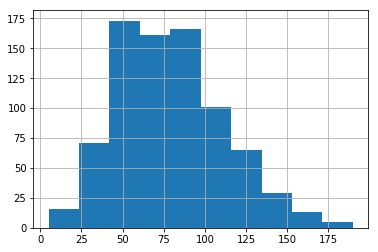

In [24]:
#Una visualizacion simple
data.Attack.hist()#se tiene la distribucion de los valores en grafica

In [25]:
data.Attack.min()

5

In [26]:
data.Attack.max()

190

In [30]:
#Cuantos type 1 y type 2 tenemos
data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [34]:
#Attack promedio tipo 1 y type 2
data.groupby('Type 1')['Total'].mean().sort_values(ascending=False)#Agrupa todos los type1

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

In [35]:
#combinar valores type 1 y type 2 
data.groupby(['Type 1','Type 2'])['Attack'].max().sort_values(ascending=False)

Type 1    Type 2  
Psychic   Fighting    190
Bug       Fighting    185
Ground    Fire        180
Dragon    Flying      180
          Ice         170
          Ground      170
Rock      Dark        164
Fire      Fighting    160
Rock      Fairy       160
Psychic   Dark        160
Water     Dark        155
Bug       Flying      155
          Poison      150
Dragon    Electric    150
Steel     Ghost       150
Water     Ground      150
Bug       Steel       150
Fighting  Steel       145
Steel     Psychic     145
Ground    Flying      145
Rock      Flying      140
Ground    Rock        140
Normal    Fighting    136
Ground    Steel       135
Grass     Ice         132
Dark      Flying      131
Fire      Flying      130
Ice       Ground      130
Dragon    Psychic     130
Grass     Fighting    130
                     ... 
Poison    Dragon       75
Electric  Steel        70
Water     Grass        70
Ground    Psychic      70
Flying    Dragon       70
Normal    Fairy        70
Fire      Psychic  

In [42]:
#Visualizar una columna contra otra hay que importar la siguiente libreria
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


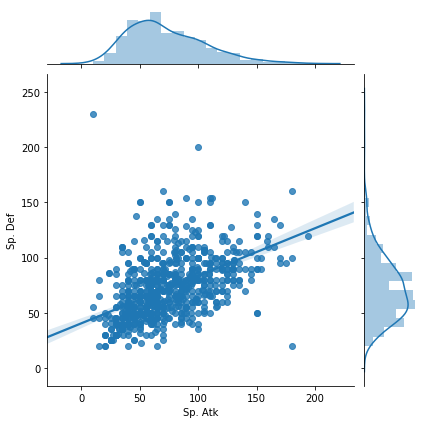

In [47]:
sns.jointplot(x='Sp. Atk',y='Sp. Def',data=data,kind='reg')

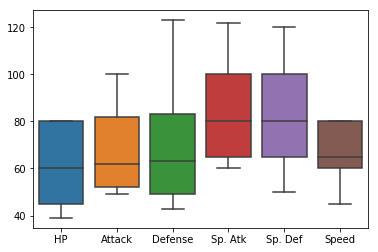

In [51]:
sns.boxplot(data= data.drop(['Name','Total','Legendary','Generation'],axis=1).head())